In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image
%matplotlib inline

In [3]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [4]:
URL = r"https://www.dropbox.com/s/0oe92zziik5mwhf/opencv_bootcamp_assets_NB4.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), "opencv_bootcamp_assets_NB4.zip")

# Download if assest ZIP does not exists.
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

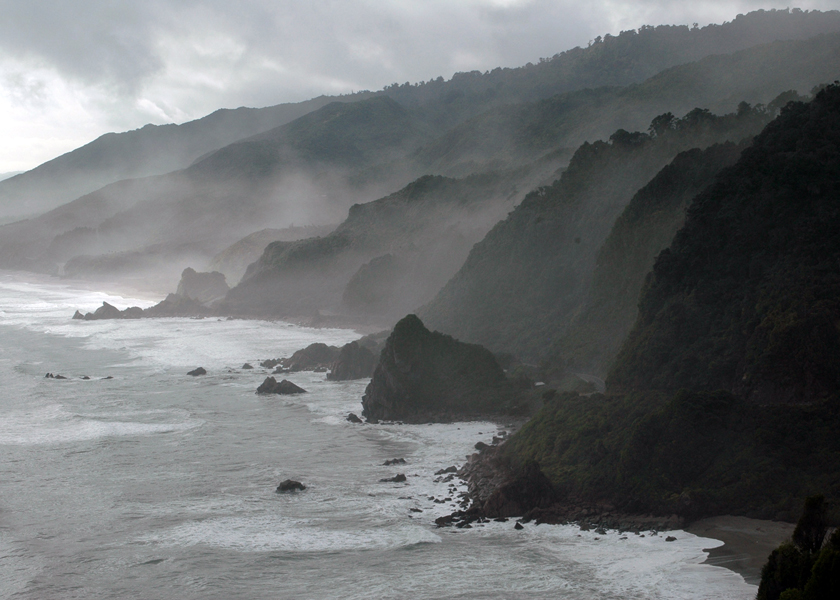

In [11]:
# Original image
img_bgr = cv2.imread("New_Zealand_Coast.jpg", cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

Image(filename = "New_Zealand_Coast.jpg")

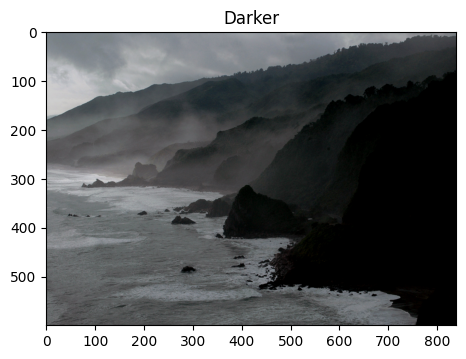

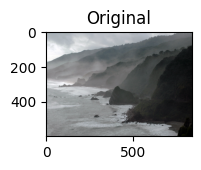

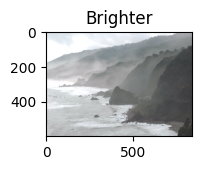

In [10]:
# Addition to increase Brightness
matrix = np.ones(img_rgb.shape, dtype = "uint8") * 50

img_rgb_brighter = cv2.add(img_rgb, matrix)
img_rgb_darker = cv2.subtract(img_rgb, matrix)

plt.figure(figsize = [18, 5])
plt.subplot(131); plt.imshow(img_rgb_darker); plt.title("Darker"); plt.show()
plt.subplot(132); plt.imshow(img_rgb); plt.title("Original"); plt.show()
plt.subplot(133); plt.imshow(img_rgb_brighter); plt.title("Brighter"); plt.show()

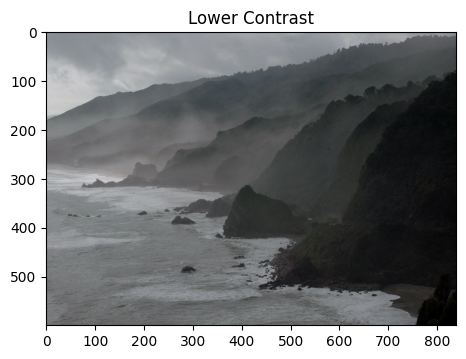

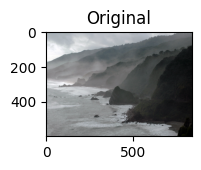

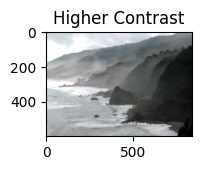

In [14]:
# Multiplication to change Contrast
matrix_low_contrast = np.ones(img_rgb.shape) * 0.8
matrix_high_contrast = np.ones(img_rgb.shape) * 1.2

img_rgb_darker = np.uint8(cv2.multiply(np.float64(img_rgb), matrix_low_contrast))
# After multiplying, the values already high become greater than 255
# To overcome, we add 0, 255 at the end
img_rgb_brighter = np.uint8(np.clip(cv2.multiply(np.float64(img_rgb), matrix_high_contrast), 0, 255))

# Show the images
plt.figure(figsize = [18, 5])
plt.subplot(131); plt.imshow(img_rgb_darker); plt.title("Lower Contrast"); plt.show()
plt.subplot(132); plt.imshow(img_rgb); plt.title("Original"); plt.show()
plt.subplot(133); plt.imshow(img_rgb_brighter); plt.title("Higher Contrast"); plt.show()

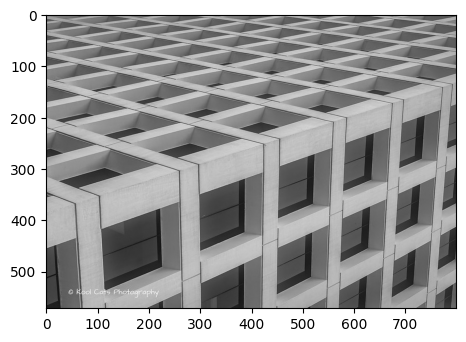

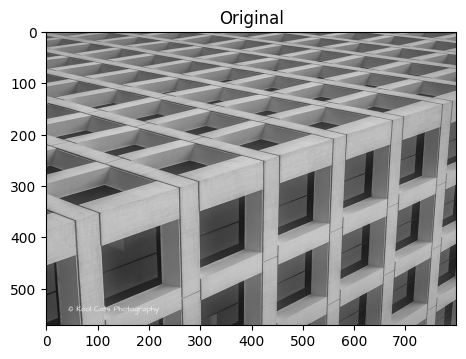

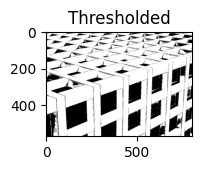

(572, 800)


In [16]:
# Image Thresholding
img_read = cv2.imread("building-windows.jpg", cv2.IMREAD_GRAYSCALE)
retval, img_thresh = cv2.threshold(img_read, 100, 255, cv2.THRESH_BINARY)

plt.figure(figsize = [18, 5])
plt.subplot(131); plt.imshow(img_read, cmap = "gray"); plt.title("Original"); plt.show()
plt.subplot(132); plt.imshow(img_thresh, cmap = "gray"); plt.title("Thresholded"); plt.show()

print(img_thresh.shape)

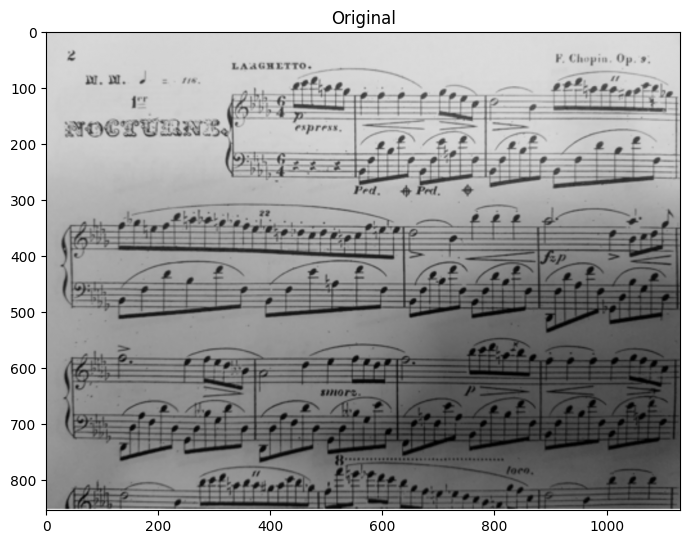

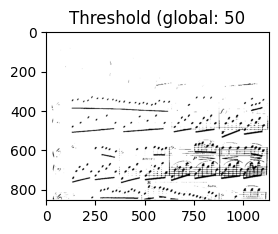

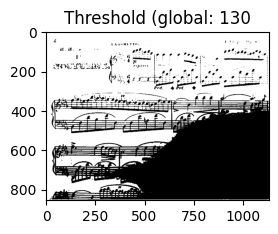

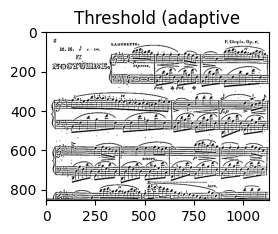

In [18]:
# Application: Sheet Music Reader
img_read = cv2.imread("Piano_Sheet_Music.png", cv2.IMREAD_GRAYSCALE)

# Perform Global Thresholding
retval, img_thresh_gbl_1 = cv2.threshold(img_read, 50, 255, cv2.THRESH_BINARY)

# Perform Global Thresholding
retval, img_thresh_gbl_2 = cv2.threshold(img_read, 130, 255, cv2.THRESH_BINARY)

# Perform Adaptive Thresholding
img_thresh_adp = cv2.adaptiveThreshold(img_read, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 7)

# Show the images
plt.figure(figsize = [18, 15])
plt.subplot(221); plt.imshow(img_read, cmap = "gray"); plt.title("Original"); plt.show()
plt.subplot(222); plt.imshow(img_thresh_gbl_1, cmap = "gray"); plt.title("Threshold (global: 50"); plt.show()
plt.subplot(223); plt.imshow(img_thresh_gbl_2, cmap = "gray"); plt.title("Threshold (global: 130"); plt.show()
plt.subplot(224); plt.imshow(img_thresh_adp, cmap = "gray"); plt.title("Threshold (adaptive"); plt.show()

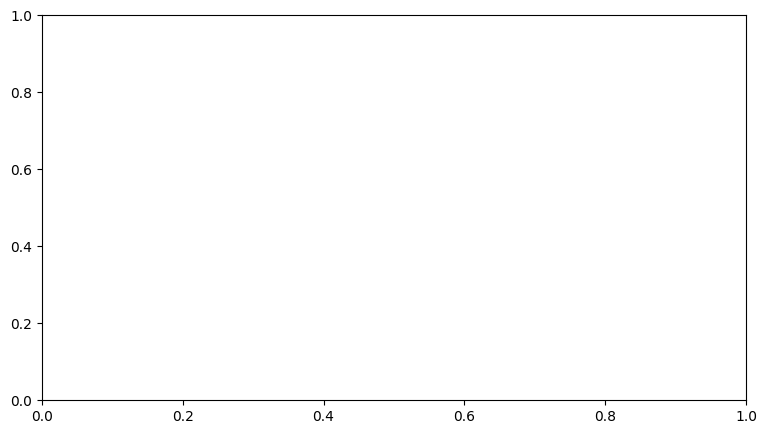

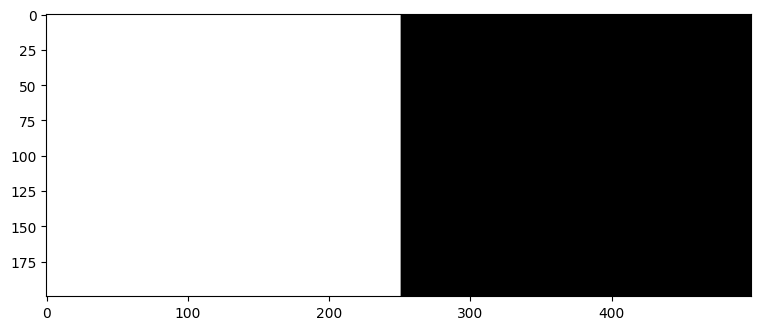

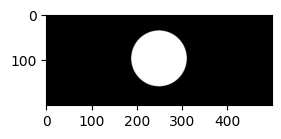

(200, 499)


In [20]:
# Bitwise Operations
img_rec = cv2.imread("rectangle.jpg", cv2.IMREAD_GRAYSCALE)

img_cir = cv2.imread("circle.jpg", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize = [20, 5])
plt.subplot(121); plt.imshow(img_rec, cmap = "gray"); plt.show()
plt.subplot(122); plt.imshow(img_cir, cmap = "gray"); plt.show()
print(img_rec.shape)

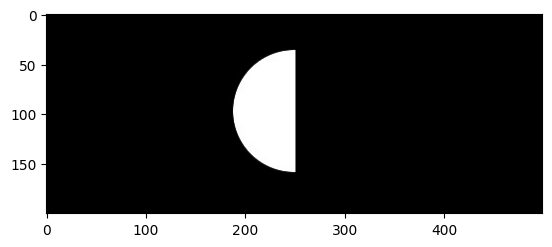

In [23]:
# Bitwise AND
result = cv2.bitwise_and(img_rec, img_cir, mask = None)
plt.imshow(result, cmap = "gray"); plt.show()

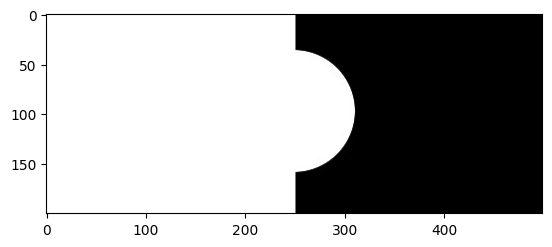

In [25]:
# Bitwise OR
result = cv2.bitwise_or(img_rec, img_cir, mask = None)
plt.imshow(result, cmap = "gray"); plt.show()

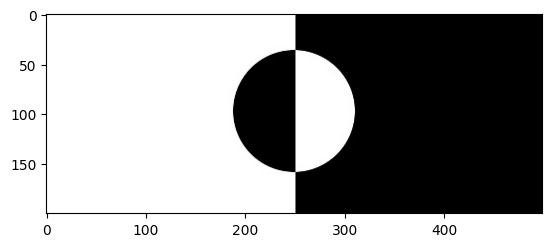

In [26]:
# Bitwise XOR
result = cv2.bitwise_xor(img_rec, img_cir, mask = None)
plt.imshow(result, cmap = "gray"); plt.show()

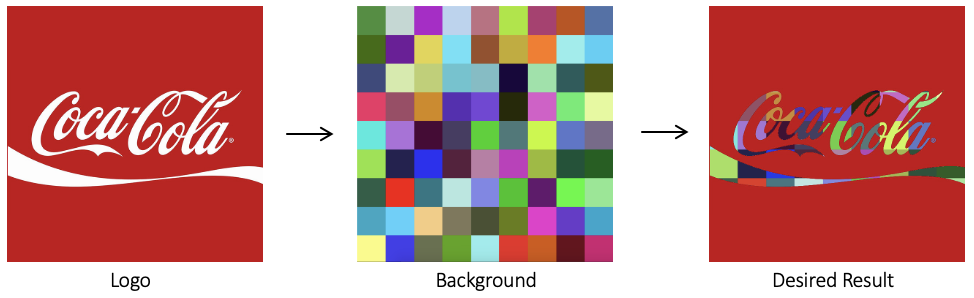

In [27]:
# Application: Logo Manipulation
Image(filename = "Logo_Manipulation.png")

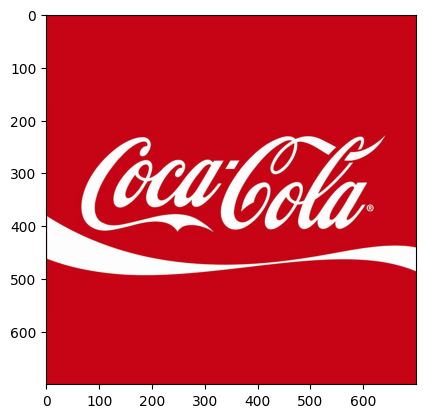

(700, 700, 3)


In [28]:
# Read Foreground image
img_bgr = cv2.imread("coca-cola-logo.png")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb); plt.show()

print(img_rgb.shape)

logo_h = img_rgb.shape[0]
logo_w = img_rgb.shape[1]

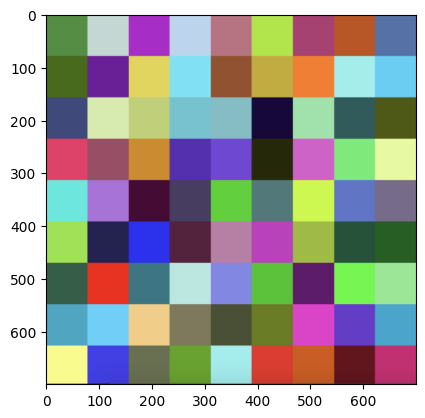

(700, 700, 3)


In [29]:
# Read Background image
img_background_bgr = cv2.imread("checkerboard_color.png")
img_background_rgb = cv2.cvtColor(img_background_bgr, cv2.COLOR_BGR2RGB)

# Resize background image to same size as logo image
img_background_rgb = cv2.resize(img_background_rgb, (logo_w, logo_h), interpolation = cv2.INTER_AREA)

plt.imshow(img_background_rgb); plt.show()
print(img_background_rgb.shape)

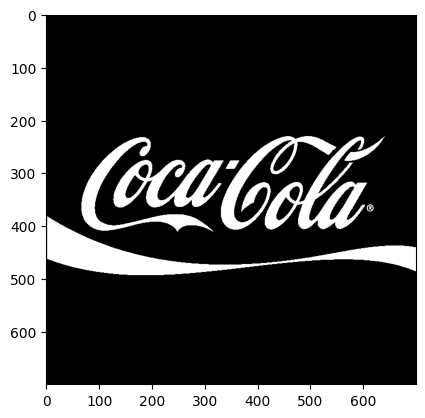

(700, 700)


In [31]:
# Create Mask for original image
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Apply global thresholding to create a binary mask of the logo
retval, img_mask = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

plt.imshow(img_mask, cmap = "gray"); plt.show()
print(img_mask.shape)

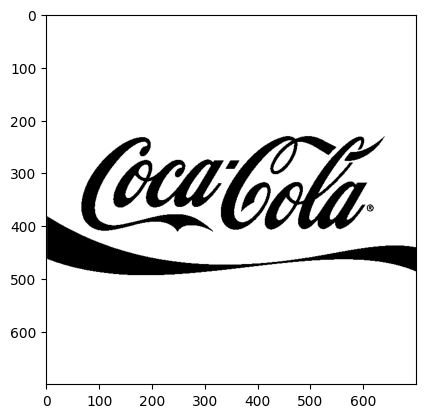

In [32]:
# Invert the mask
img_mask_inv = cv2.bitwise_not(img_mask)
plt.imshow(img_mask_inv, cmap = "gray"); plt.show()

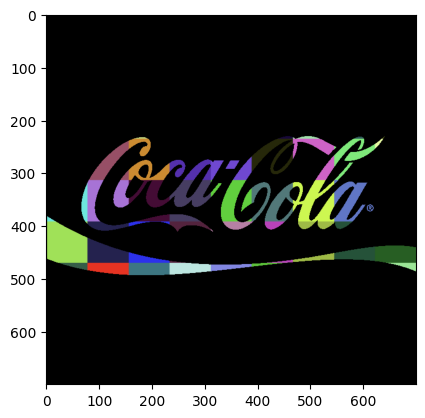

In [33]:
# Apply background to the mask
img_background = cv2.bitwise_and(img_background_rgb, img_background_rgb, mask = img_mask)
plt.imshow(img_background); plt.show()

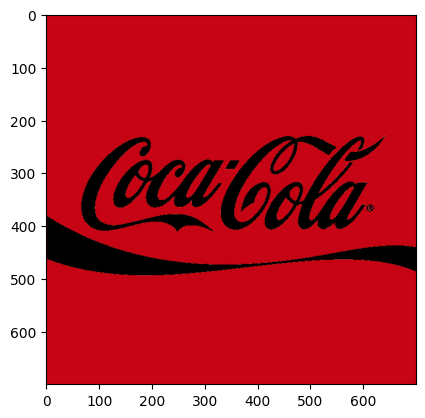

In [35]:
# Isolate foreground image from image
img_foreground = cv2.bitwise_and(img_rgb, img_rgb, mask = img_mask_inv)
plt.imshow(img_foreground); plt.show()

In [ ]:
# Merge foreground and background
result = cv2.add(img_background, img_foreground)
plt.imshow(result); plt.show()
cv2.imwrite()